In [1]:
# Parameters
h5_name = '{PATH_TO_CATATAC_5_CRISPR9_ONLY_SINGLETS_H5SEURAT}'
protosp_path = '{PATH_TO_PROTOSPACERS_4SET_TSV}'
library = "CRISPR9"
tsv_path = '{PATH_TO_TSV}'


In [2]:
library(Seurat)
library(SeuratDisk)
library(dplyr)
library(ggplot2)
library(patchwork)
library(stringr)
library(crayon)

Error in .make_numeric_version(x, strict, .standard_regexps()$valid_numeric_version) : 
  invalid non-character version specification 'x' (type: double)


Attaching SeuratObject

Attaching sp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘crayon’


The following object is masked from ‘package:ggplot2’:

    %+%




In [3]:
h5_w_gcap_name <- sub(".h5seurat", "_w_GUIDE_CAP.h5seurat", h5_name)
barcode2guide_tsv_path <- paste0(tsv_path, '{PATH_TO_LIBRARY_ALL_STRUCTURED_TSV}')
tsv_name <- paste0(tsv_path, '{PATH_TO_LIBRARY_PIVOT_TSV}')

In [4]:
df_protosp = read.table(protosp_path, header=TRUE, comment.char="")

In [5]:
tfs_w_ntctl    = unique(df_protosp$X.TargetGene)
unselect_ntctl = (tfs_w_ntctl != "NTCTL") & (tfs_w_ntctl != "NTCTRL")
tfs_to_plot    = tfs_w_ntctl[unselect_ntctl]

guides_to_plot  = df_protosp$GuideName
tfs_to_plot
guides_to_plot

[1] "GATA5"   "MEOX1"   "NEUROG2"

[1] "GATA5_1"   "GATA5_2"   "MEOX1_1"   "MEOX1_2"   "NEUROG2_1" "NEUROG2_2"
[7] "NTCTL_1"   "NTCTL_2"

In [6]:
df_guide <- read.table(tsv_name, header = TRUE, sep = "\t", quote = "")
tf_list  <- intersect(guides_to_plot, colnames(df_guide))

guide_counts  <- t(data.matrix(df_guide[,tf_list]))
colnames(guide_counts) <- df_guide$barcode_dash
guide_counts

,AAACAGCCAAACATAG-1,AAACAGCCAAACGCGA-1,AAACAGCCAAAGCGCA-1,AAACAGCCAAATATCC-1,AAACAGCCAAATTGCT-1,AAACAGCCAACTAGAA-1,AAACAGCCAACTGGCT-1,AAACAGCCAATAGCCC-1,AAACAGCCAATATACC-1,AAACAGCCAATCCTAG-1,⋯,TTTGTTGGTTAGCGTA-1,TTTGTTGGTTAGTACG-1,TTTGTTGGTTCACCAT-1,TTTGTTGGTTCGCTCA-1,TTTGTTGGTTCTTTAG-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTGTCCAT-1,TTTGTTGGTTTACCGT-1,TTTGTTGGTTTGCGCC-1,TTTGTTGGTTTGTCTA-1
GATA5_1,18,2,0,0,0,8,6,8,0,0,⋯,2,0,0,2,0,0,2,0,0,0
GATA5_2,0,0,0,0,0,11,0,13,0,0,⋯,9,0,0,7,0,0,0,0,2,0
MEOX1_1,0,23,12,11,18,25,0,0,3,15,⋯,11,2,0,0,9,14,0,0,0,2
MEOX1_2,0,8,0,24,0,0,0,0,0,0,⋯,0,3,12,0,0,0,0,0,0,0
NEUROG2_1,54,2,0,0,10,15,6,0,0,0,⋯,17,0,0,0,0,0,0,9,2,21
NEUROG2_2,0,16,15,0,0,6,0,5,1,0,⋯,4,0,0,0,6,7,9,0,0,0
NTCTL_1,0,0,0,0,0,0,0,0,0,0,⋯,11,0,0,0,0,0,0,32,0,0
NTCTL_2,0,0,0,0,0,0,0,12,6,0,⋯,0,11,0,0,0,0,0,0,0,0


In [7]:
N_MIN_GUIDES <- 10
select_overlapping   <-
    df_guide$in_multiome & (df_guide$n_guides >= N_MIN_GUIDES)

overlapping_barcodes <- df_guide[select_overlapping, ]$barcode_dash
overlapping_barcodes <- as.vector(overlapping_barcodes)

overlapping_guide_counts <- guide_counts[, overlapping_barcodes]

n_all_overlapping <- nrow(df_guide[df_guide$in_multiome, ])
paste("Overlapping barcodes w/ min guides =", N_MIN_GUIDES,": ", length(overlapping_barcodes))
paste("Overlapping barcodes w/ min guides =", 1,": ", n_all_overlapping)


[1] "Overlapping barcodes w/ min guides = 10 :  6656"

[1] "Overlapping barcodes w/ min guides = 1 :  6774"

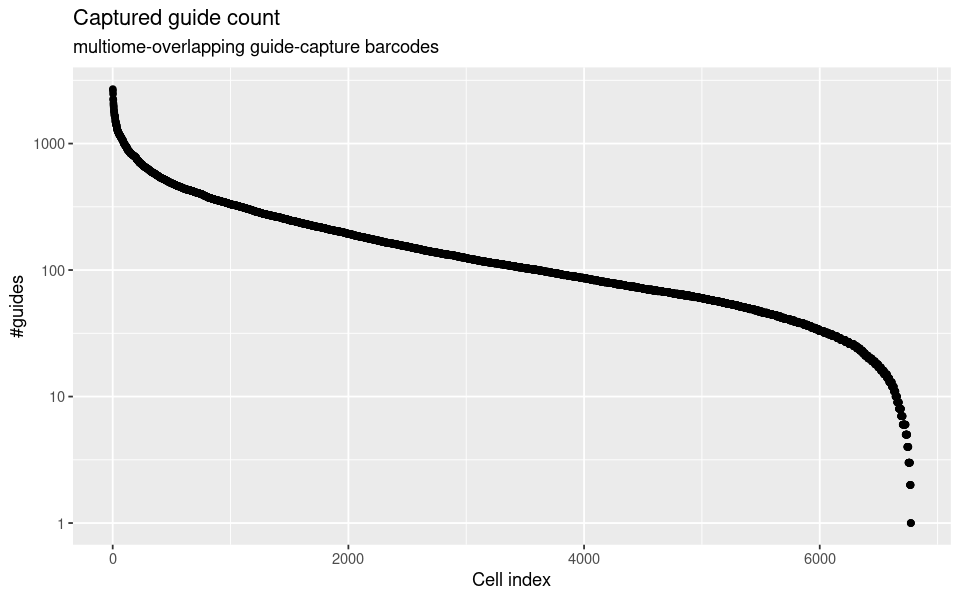

In [8]:
df_in_multiome          <- df_guide[df_guide$in_multiome, ]

options(repr.plot.width = 8, repr.plot.height = 5)
df_dummy <- df_in_multiome[order(-df_in_multiome$n_guides),]

ggplot(df_dummy, aes(x=1:nrow(df_dummy), y = n_guides)) +
    geom_point() +
    labs(title = "Captured guide count", x = "Cell index") +
    labs(subtitle = "multiome-overlapping guide-capture barcodes", y = "#guides") +
    scale_y_log10()

# Figure 1H

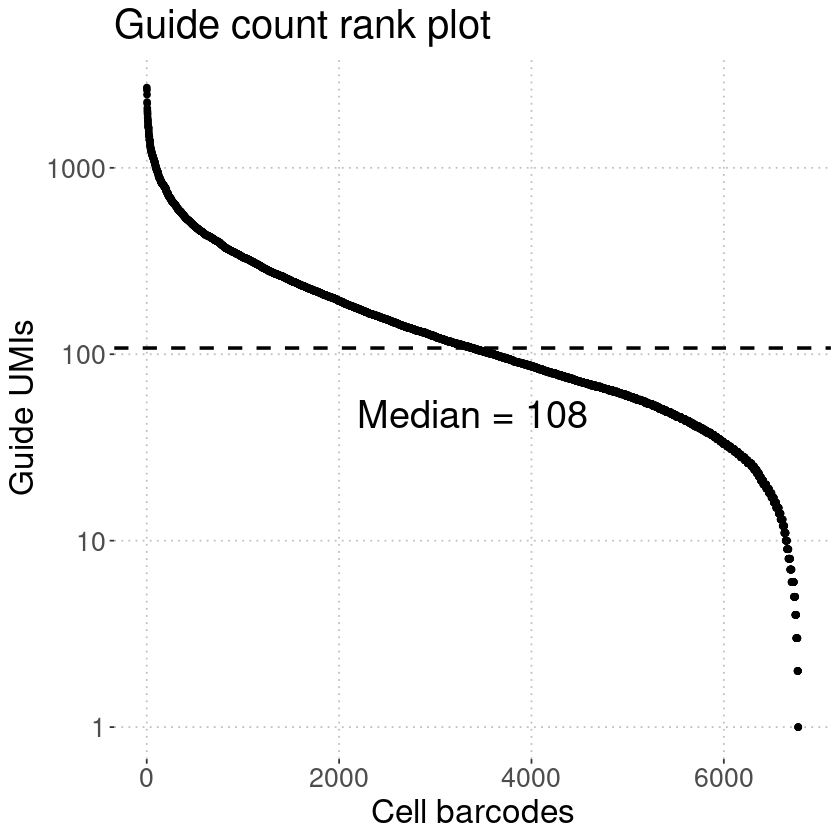

In [44]:
options(repr.plot.width=7, repr.plot.height=7)

ggplot(df_dummy, aes(x=1:nrow(df_dummy), y = n_guides)) +
    geom_point() +
    annotate("text", x = nrow(df_dummy) / 2, y = median_value - 60, 
           label = paste("Median =", round(median_value, 2)), size = 8) +
  labs(title = "Guide count rank plot", x = "Cell barcodes", y = "Guide UMIs") +
  scale_y_log10() +
  scale_color_manual(values = colors, name = "Experiment") +
  geom_hline(yintercept = median_value, linetype = "dashed", size = 1) +
  theme(text = element_text(size = 20),
       legend.key = element_rect(fill = "white", color = NA)) +
  theme(panel.background = element_rect(fill = 'white'),
        panel.grid.major = element_line(color = 'grey', linetype = 'dotted')) +
  theme(legend.key.size = unit(1, units = "cm")) 

In [36]:
# Calculate the median of the n_guides column
median_value <- median(df_dummy$n_guides)
median_value

[1] 108